# Practice toy project in the second day of 100 days code challenge

In [1]:
# Context: I want to build a predictive analytics models for an insurance dataset from Kaggle.
# Task: Put into practice some suggestions from yesterday (either do bivariate analysis, construct the correlation matrix and/or remove the outliers).

## Action:

In [1]:
# Import libraries.

import pandas as pd # Provides data structures and operations for manipulating numeric arrays.
import numpy as np # Intended to manipulate matrices or multidimensional arrays.
import seaborn as sns # Python data visualization library based on matplotlib.
import plotly.express as px # It contains functions that can create entire figures at once.

from matplotlib.cbook import boxplot_stats # Return a list of dictionaries of statistics used to draw a series of box.
import statsmodels.api as sm # It provides classes and functions for the estimation of many different statistical models.
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, cross_val_predict
# train_test_split splits arrays or matrices into random train and test subsets.
# GridSearchCV searchs over specified parameter values for an estimator. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
# cross_val_score evaluates a score by cross-validation.
# cross_val_predict: The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set.
from statsmodels.stats.outliers_influence import variance_inflation_factor # Ratio of the variance of estimating some parameter in a model that includes multiple other terms by the variance of a model constructed using only one term.

In [5]:
# I will now store the data in the pandas framework.

data_frame_day2 = pd.read_csv('insurance.csv')

In [6]:
# To see the first and last 5 rows:

print(data_frame_day2)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [7]:
# Let's understand now the data type:

data_frame_day2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
### Notice we don't have null values.

In [8]:
# We have clean dataset. Therefore, we will proceed with further exploration:
# Let's group the variables into numerical and categorical variables.

numeric_features = data_frame_day2[["age","bmi","children","charges"]]

categorical_features = data_frame_day2[["sex","smoker","region"]]

In [9]:
# A bit more of exploration different from yesterday:

data_frame_day2.describe() # Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Notice it does it only with the numeric variables. We can see:

### Count number of non-null observations.
### Mean of the values.
### Standard deviation.
### Maximum and minimum of the values.
### Lower (25%), 50 (same as the median) and upper (75%) percentiles.

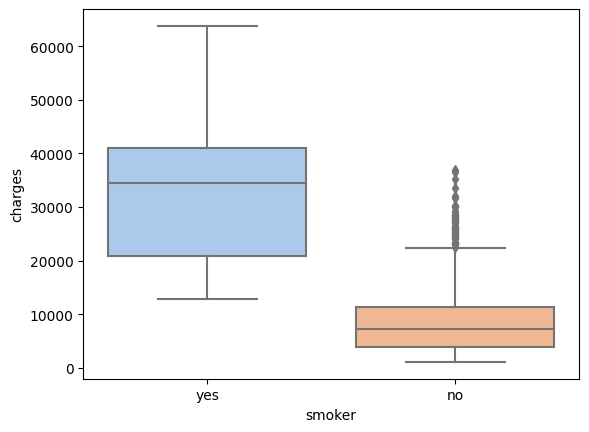

In [11]:
# Let's keep working the outliers of yesterday:

sns.set_palette('pastel') # 'Cuz cute.

box_smoker_charges = sns.boxplot(x='smoker',y='charges',data=data_frame_day2)

In [47]:
# I want to work just with the outliers of the 'no', I don't know exactly how to get thenm "separated" from the group, but I will create a different dataset for just keep practicing with the outliers:
#(***?)

data_frame_day2.copy().loc[data_frame_day2.copy()['smoker'] == 'no'] # loc[] access a group of rows and columns by label(s)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [49]:
data_for_no_smoker_charges_box = pd.DataFrame([]) # New dataframe

In [54]:
no_smokers = data_frame_day2.copy().loc[data_frame_day2.copy()['smoker'] == 'no']
data_for_no_smoker_charges_box = data_for_no_smoker_charges_box.append(no_smokers) 

C:\Users\dafda\AppData\Local\Temp\ipykernel_9276\521672708.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_for_no_smoker_charges_box = data_for_no_smoker_charges_box.append(no_smokers)


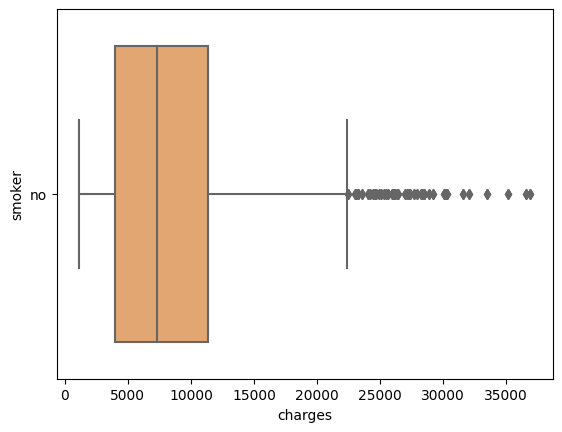

In [79]:
box_no_smoker_charges = sns.boxplot(y='smoker',x='charges',data=data_for_no_smoker_charges_box, color='sandybrown')

In [69]:
# Print the outliers values in the new smoker_no column:
outlier_list_non_smoker = boxplot_stats(data_for_no_smoker_charges_box.charges).pop(0)['fliers'].tolist()
# pop(0) means it removes the element in the index that is first element of the list.
# 'fliers' are points plotted individually-> they would be the same as outliers, no?
print(outlier_list_non_smoker)

[28923.13692, 30166.61817, 30259.99556, 27322.73386, 27375.90478, 25081.76784, 24227.33724, 35160.13457, 24476.47851, 25992.82104, 24671.66334, 24603.04837, 27000.98473, 30284.64294, 23082.95533, 28287.89766, 23288.9284, 24513.09126, 27724.28875, 25656.57526, 24059.68019, 27346.04207, 31620.00106, 33471.97189, 24915.04626, 26392.26029, 26236.57997, 29186.48236, 27941.28758, 28476.73499, 26140.3603, 25333.33284, 32108.66282, 28468.91901, 26467.09737, 25517.11363, 28340.18885, 23241.47453, 36580.28216, 26018.95052, 22493.65964, 23045.56616, 27117.99378, 36910.60803, 23563.01618, 30063.58055, 28923.13692, 30166.61817, 30259.99556, 27322.73386, 27375.90478, 25081.76784, 24227.33724, 35160.13457, 24476.47851, 25992.82104, 24671.66334, 24603.04837, 27000.98473, 30284.64294, 23082.95533, 28287.89766, 23288.9284, 24513.09126, 27724.28875, 25656.57526, 24059.68019, 27346.04207, 31620.00106, 33471.97189, 24915.04626, 26392.26029, 26236.57997, 29186.48236, 27941.28758, 28476.73499, 26140.3603, 25

In [70]:
len(outlier_list_non_smoker) 

92

In [ ]:
# It looks like it is repeating the values... (???*). Nevertheless, "at naked eye" it looks like the same values to me in comparison to yesterday.

In [73]:
# Print the number of rows containing outliers:
outlier_rows_non_smoker = data_for_no_smoker_charges_box[data_for_no_smoker_charges_box.charges.isin(outlier_list_non_smoker)].shape[0]/2
print("Number of charges rows contaning outliers from the no_smokers : ", outlier_rows_non_smoker)
# I am dividing by two for that repetition that I have.

# Percentage of rows which are outliers:
percent_outlier_non_smoker = (outlier_rows_non_smoker/data_for_no_smoker_charges_box.shape[0])*100
print("Percentage of outliers in charge column from the no_smokers : ", percent_outlier_non_smoker)

Number of charges rows contaning outliers from the no_smokers :  46.0
Percentage of outliers in charge column from the no_smokers :  2.161654135338346


## Results:

In [ ]:
# The outlier % is ~2%. 
# Is it negetible ? I would need to evaluate if it reflects the target population, research question, and/or research methodology. 
# In general, as I am not sure if they are errors and it is 2%, I will keep them.
# As it is a large sample, I think outliers are expected to occur and they won't change the results. 

## Sugestions and references:

In [ ]:
# For tomorrow, I would like to construct (at least) a basic linear regression model.